# Car Classification (Question 2)

In [1]:
!/usr/local/anaconda3/bin/pip install pandas matplotlib seaborn sklearn

The system cannot find the path specified.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
%matplotlib inline

# Data Preprocessing
Import the data and adding the missing headers

In [3]:
data = pd.read_csv("data/car.data", header=None, names=["buying","maint","doors","persons","lug_boot","safety","class"])

checking the data for any missing values

In [4]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [5]:
for i in data.columns:
    print(data[i].value_counts())
    print()

low      432
vhigh    432
high     432
med      432
Name: buying, dtype: int64

low      432
vhigh    432
high     432
med      432
Name: maint, dtype: int64

5more    432
2        432
3        432
4        432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
big      576
med      576
Name: lug_boot, dtype: int64

low     576
high    576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



It looks like there are no missing value, we shall proceed with data exploration part where in we try to figure out usefull information in the data

# Data Exploration

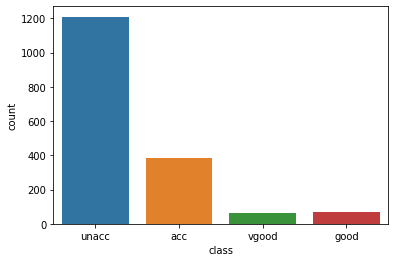

In [6]:
sns.countplot(data['class'])

Plotting count of each attribute's data count. This is done to better understand our data and there spread

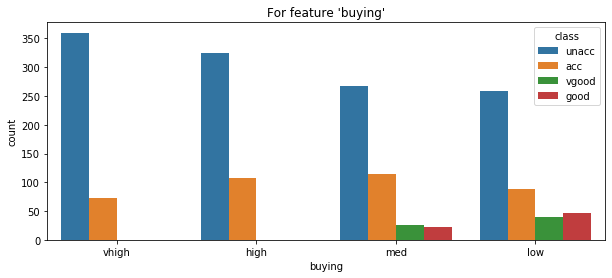

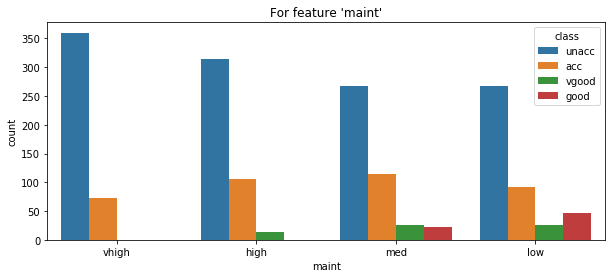

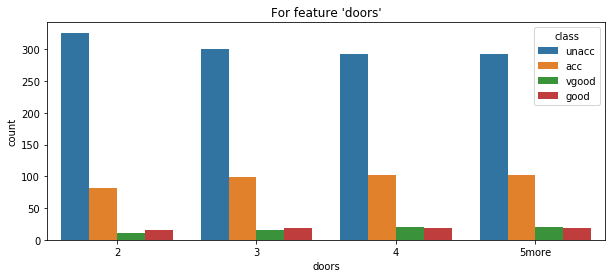

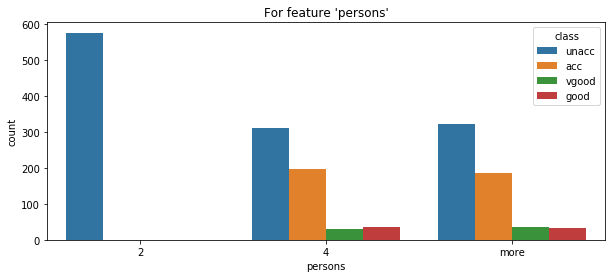

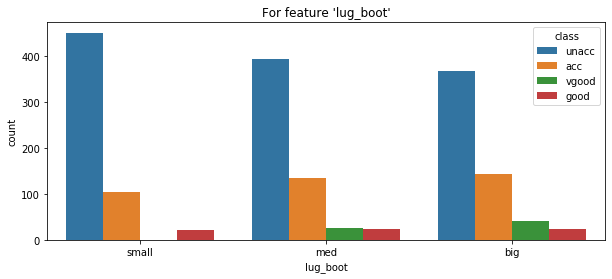

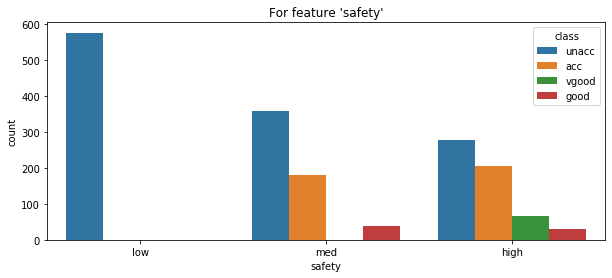

In [7]:

for i in data.columns[:-1]:
    plt.figure(figsize=(10,4))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class'])

Converting nominal data type to integer value so that we had handle data better

In [8]:
le = LabelEncoder()

In [9]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [10]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Plotting heatmap  for different attribute

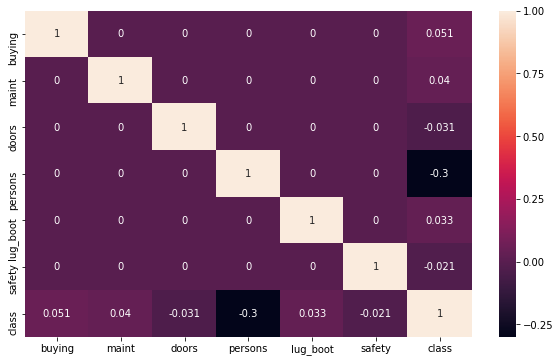

In [11]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

# Model Training
Using logistic regression to model our data

## K-Fold cross validation

In [12]:
X=data[data.columns[:-1]]
Y=data['class']
kf = KFold(n_splits=10) # Define the split - into 10 folds 
logreg=LogisticRegression()

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
def predict_labels(clf, features):
    return (clf.predict(features))
pred_scores = []
i=0
X_List = np.array(X)
kf.get_n_splits(X_List)
for train_index, test_index in kf.split(X_List):
    features_train, features_test = X_List[train_index], X_List[test_index]
    labels_train, labels_test = Y[train_index], Y[test_index]
    i+=1
    train_classifier(logreg, features_train, labels_train)
    pred = predict_labels(logreg,features_test)
    pred_scores.append(("logreg - Gen " + str(i), [accuracy_score(labels_test,pred)]))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Model Accuracy value

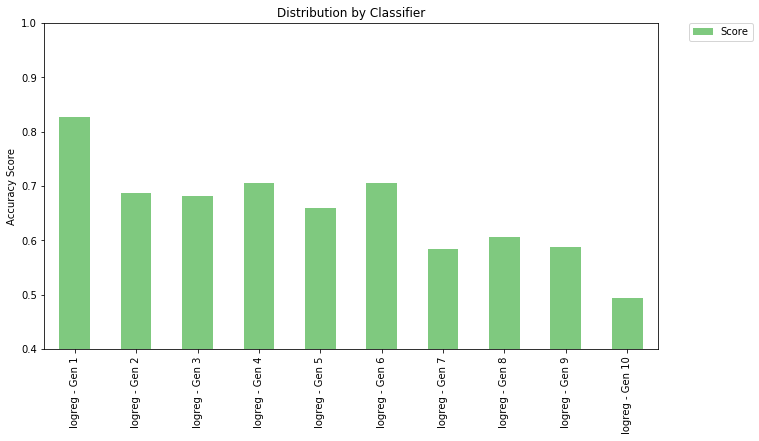

In [14]:
import collections
df = pd.DataFrame.from_dict(collections.OrderedDict(pred_scores),orient='index', columns=['Score'])
df.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(10), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
# Do k-fold cross-validation
cv_results = cross_val_predict(logreg, # Pipeline
                             X, # Feature matrix
                             Y, # Target vector
                             cv=kf, # Cross-validation technique
#                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [16]:
cv_results.mean()

1.7592592592592593

In [17]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Trying to predict a value

In [18]:
logreg.predict([[1,3,4,3,3,3]])

array([2])